In [1]:
# Get mutual fund historical data from Yahoo! Finance

# Load some useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
from bs4 import BeautifulSoup
import json
import requests
from selenium import webdriver
import time
import re


In [2]:
# Mid Cap Growth Selector - >5yr Manager, >5yr fund inception, >50M assets
URL = "https://www.fidelity.com/fund-screener/evaluator.shtml#!&ft=DSTK_MG&ntf=N&expand=%24FundType&mTn=GS5&iDt=GS5&fAt=GS50000000"
browser = webdriver.Chrome(executable_path = 'C:\\Program Files\\ChromeDriver\\chromedriver_win32\\chromedriver.exe')
browser.get(URL)
time.sleep(10) #wait for webpage to load fully

In [3]:
def getFundsFromPage(browser, fundnames = set()): 
    table = browser.find_element_by_class_name('right-content')
    table = table.find_element_by_id('grid_body')
    links = table.find_elements_by_tag_name('a')
    for link in links: 
        text = link.text
        ticker = re.search(r'\([A-Z]{5}\)', text)
        if ticker: 
            ticker = ticker.group(0)[1:-1]
            fundnames.add(ticker)
    return fundnames

newpages = True
limit = 30
i = 0

In [4]:
while(i < limit): 
    fundnames = getFundsFromPage(browser)
    print(f'Number of Funds Found: {len(fundnames)}')
    try: 
        browser.find_element_by_link_text('Next').click()
        time.sleep(2)
        i+=1
    except: 
        break

fundnames = list(fundnames)
        

Number of Funds Found: 21
Number of Funds Found: 41
Number of Funds Found: 61
Number of Funds Found: 81
Number of Funds Found: 101
Number of Funds Found: 121
Number of Funds Found: 140
Number of Funds Found: 160
Number of Funds Found: 180
Number of Funds Found: 187


In [5]:
def YahooTotalReturnHistorytoCSV(ticker, df): 
    '''Get Yearly Total Returns from Yahoo! Finance and append to dataframe'''
    URL = "https://finance.yahoo.com/quote/"+ticker+"/performance?p="+ticker
    response = requests.get(URL)
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all(class_ = "Mb(25px)")
    totalreturn = tables[2]
    totalreturn = list(totalreturn.children)
    title = totalreturn[0].text
    table = totalreturn[1]
    rows = list(table.children)
    df[ticker] = np.NaN
    if len(rows) > 1: 
        #colheaders = [tag.text for tag in rows[0].children]
        #trDF = pd.DataFrame(columns = colheaders)
        num_rows = len(rows)-1
        for i in range(2, num_rows+1): #skip column header and current year
            #data = [tag.text for tag in rows[i].children]
            #trDF.loc[i-1] = data
            year, _, fundtr, cattr = [tag.text for tag in rows[i].children]
            df.loc[int(year), ticker] = fundtr
        #trDF.to_csv(ticker+'.csv')
        return True, df
    else: 
        return False, df

def getYahooFundProfile(ticker, df = pd.DataFrame()): 
    '''Get Fund Profile Metrics from Yahoo! Finance and append to dataframe '''
    INDEX_profiletable = 0
    INDEX_fundoperations = 1
    INDEX_fundexpenses = 2
    URL = "https://finance.yahoo.com/quote/" + ticker + "/profile?p=" + ticker
    response = requests.get(URL)
    response.content
    soup = BeautifulSoup(response.content, 'html.parser')
    datatables = soup.find_all(class_ = "Mb(25px)")
    overview = datatables[INDEX_profiletable].find('div')
    funddata = dict()
    for row in overview.children: 
        [name, value] = [tag.text for tag in list(row)]
        funddata[name] = value
    operations = datatables[INDEX_fundoperations].find('div')
    for row in operations.children: 
        [name, value] = [tag.text for tag in list(row)]
        funddata[name] = value


    expenses = datatables[INDEX_fundexpenses].find('div')
    for row in expenses.children:
        [name, value, _] = [tag.text for tag in list(row)]
        funddata[name] = value
    
    funddf = pd.DataFrame(funddata, index = [0])
    df = df.append(funddf, ignore_index = True)
    return df

In [6]:
funddata = pd.DataFrame()
totalreturn = pd.DataFrame(index = range(1924, 2019)) #First mutual fund founded in 1924
trHistorySuccess = []
WAIT_TIME = 1 #worry about getting banned for accessing yahoo too much
for ticker in fundnames: 
    success, totalreturn = YahooTotalReturnHistorytoCSV(ticker, totalreturn)
    trHistorySuccess.append(success)
    funddata = getYahooFundProfile(ticker, df = funddata.copy())
    print(ticker)
    time.sleep(WAIT_TIME)

SSMGX
PEEAX
TCMGX
SUFCX
WSMNX
AMGCX
HFMCX
MCMAX
JSMTX
HFCSX
OMGCX
APDMX
TEGIX
OSGIX
TEGYX
TQMIX
RIVBX
NBNGX
WFDSX
ETGLX
WSMDX
CCSMX
ADJEX
VMGMX
KAUIX
LCLAX
BMDIX
PEGCX
RMDCX
KAUCX
BFGIX
OEGCX
WMGAX
SEUPX
ATGCX
WFDDX
CMGIX
TMFGX
GOFCX
VMACX
GTSGX
PPIMX
PSKCX
PGWIX
RESCX
FOGIX
CCSGX
TMDPX
OTCCX
RSSYX
NMGAX
DFDMX
HFCIX
CHCLX
BMDSX
RSMOX
RIVRX
WFEIX
IMIDX
STMGX
KNPCX
NMCAX
HOPCX
DBMCX
OEGAX
JMCCX
HAMGX
WDSCX
BQMGX
RMBMX
BARAX
MCMYX
TEGAX
PEGEX
FGSAX
HLGEX
BPTRX
HAGAX
BGRIX
FRSIX
BUFTX
ETILX
ARTMX
CHCCX
HAGIX
GROYX
HFMTX
JSMVX
CMGSX
NCTWX
VIMCX
OTCAX
HDPIX
LBGIX
NWHWX
HAGCX
BPTIX
HFMVX
VLIFX
WCGIX
ETCGX
VALSX
FGSCX
WFDAX
VLMIX
RMOYX
AWMIX
NMCCX
CFAGX
DRMCX
RSDGX
MPEGX
APSGX
MIMSX
HDPMX
PICMX
WWNPX
HRAYX
TMCIX
RSGFX
AMCZX
SMFAX
FDEGX
PRDMX
NEXTX
LBFIX
BMGCX
ETAGX
RMDAX
VMCCX
FOGRX
BGRFX
HFMSX
HFMRX
GIUIX
CIPIX
KNPYX
MXXIX
BWAFX
PEGZX
GGOAX
VSNGX
CMIDX
TOPPX
AMGAX
ATGAX
NEEIX
KAUAX
BRWIX
NMCIX
MERAX
MGOTX
WCGNX
TMCAX
SEPKX
NMGCX
PGRRX
FGSIX
KMKNX
DBMAX
MGOAX
BARIX
HIMGX
MACGX
KNPAX
NWHVX
HMDY

In [7]:
funddata['TRHistoryAvailable'] = trHistorySuccess
funddata

,Category,Fund Family,Net Assets,YTD Return,Yield,Morningstar Rating,Inception Date,Last Dividend,Last Cap Gain,Holdings Turnover,...,Annual Report Expense Ratio (net),Prospectus Net Expense Ratio,Prospectus Gross Expense Ratio,Max 12b1 Fee,Max Front End Sales Load,Max Deferred Sales Load,3 Yr Expense Projection,5 Yr Expense Projection,10 Yr Expense Projection,TRHistoryAvailable
0,Mid-Cap Growth,Sit,95.6M,20.32%,0.00%,★,"Jun 30, 1994",0.00,0.00,26.34%,...,1.50%,1.50%,1.50%,N/A,N/A,N/A,477,824,"1,801",True
1,Mid-Cap Growth,PGIM Funds (Prudential),3.35B,30.04%,0.00%,★★★,"Dec 30, 1996",0.00,0.00,36.00%,...,1.06%,1.06%,1.06%,0.30%,5.50%,N/A,869,"1,103","1,773",True
2,Mid-Cap Growth,TIAA Investments,1.47B,27.25%,0.04%,★★★,"Sep 30, 2002",0.00,0.00,70.00%,...,0.77%,0.77%,0.77%,0.25%,N/A,N/A,246,428,954,True
3,Mid-Cap Growth,Guggenheim Investments,86.76M,22.79%,0.00%,★★,"Jan 28, 1999",0.00,0.00,52.00%,...,2.33%,2.33%,2.36%,1.00%,N/A,1.00%,734,"1,258","2,694",True
4,Mid-Cap Growth,William Blair,2.89B,27.71%,0.00%,★★★★,"Dec 28, 2003",0.00,0.00,46.00%,...,1.35%,1.35%,1.44%,0.25%,N/A,N/A,447,778,"1,716",True
5,Mid-Cap Growth,Alger,189.73M,29.07%,0.00%,★★,"Jul 30, 1997",0.00,0.00,125.34%,...,2.11%,2.11%,2.11%,1.00%,N/A,1.00%,661,"1,134","2,441",True
6,Mid-Cap Growth,Hartford Mutual Funds,13.97B,25.07%,0.00%,★★★,"Dec 30, 1997",0.00,0.00,37.00%,...,1.11%,1.11%,1.11%,0.25%,5.50%,N/A,883,"1,128","1,827",True
7,Mid-Cap Growth,AMG Funds,97.63M,13.41%,0.08%,★★,"Jan 12, 1997",0.03,0.00,46.00%,...,1.08%,1.08%,1.09%,0.25%,N/A,N/A,346,600,"1,328",True
8,Mid-Cap Growth,Jackson Square,979.78M,19.05%,0.19%,★★★★,"Sep 18, 2016",0.05,0.00,47.00%,...,0.97%,0.97%,0.99%,0.00%,N/A,N/A,313,545,"1,211",True
9,Mid-Cap Growth,Hennessy,1.75B,25.54%,0.00%,★★★,"Jan 2, 1997",0.00,0.00,13.00%,...,1.48%,1.48%,1.48%,0.15%,N/A,N/A,468,808,"1,768",True


In [8]:
funddata.to_csv('funddata_MidCapGrow_50Mil_5Yr_5YR.csv')
totalreturn.to_csv('totalreturn_MidCapGrow_50Mil_5Yr_5YR.csv')

In [72]:
def trStringtoFloat(string): 
    try: 
        string = string[1:-1]
        percent = float(string)
        return percent
    except: 
        return string


In [134]:
totalreturn = pd.read_csv('totalreturn_MidCapGrow_50Mil_5Yr_5YR.csv', index_col = 0)
funddata = pd.read_csv('funddata_MidCapGrow_50Mil_5Yr_5YR.csv', index_col = 0)
numYears, numFunds = totalreturn.shape

In [135]:
totalreturn = totalreturn.apply(lambda entries: [trStringtoFloat(entry) for entry in entries], axis = 1, result_type = 'broadcast')
totalreturn['count'] = totalreturn.count(axis = 1)

Start Year: 2001


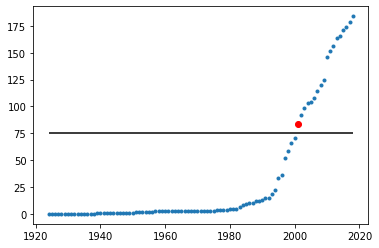

In [168]:
plt.plot(totalreturn['count'], '.')
NUMFUNDSTHRESH = 75
plt.hlines(NUMFUNDSTHRESH, 1924, 2018)
start_index = np.where(totalreturn['count'] > NUMFUNDSTHRESH)[0][0]
start_year = totalreturn.index[start_index]
plt.plot(start_year, totalreturn['count'].values[start_index], 'ro')
print(f'Start Year: {start_year}')

In [164]:
ranked = pd.DataFrame(index = totalreturn.index[start_index:], columns = totalreturn.columns[:-1] )

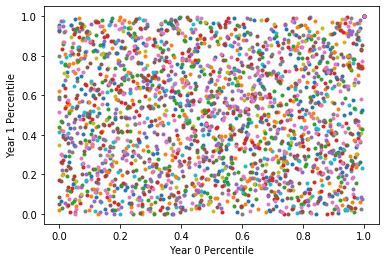

In [253]:
working = totalreturn.iloc[start_index:, :-1]
order = working.apply(np.argsort, axis = 1).astype('float64')
order['count'] = totalreturn['count']

def returnNaN(num): 
    if num < 0: 
        return np.NaN
    else: 
        return num
    
percentile = order.apply(lambda entries: [returnNaN(entry/(entries['count'])) for entry in entries], axis = 1, result_type = 'broadcast')
percentile.drop(columns = ['count'])

def calcYrVsYrCorr(percentiledf, yr1, yr2, plotOn = False): 
    testdf = percentiledf.loc[[yr1, yr2]]
    null_cols = testdf.columns[testdf.isnull().any()]
    testdf.drop(null_cols, axis = 1, inplace = True)
    if plotOn:
        plt.plot(testdf.iloc[0,:], testdf.iloc[1,:], '.')
    return testdf

def plotYrVsNextCorr(percentiledf, yr): 
    calcYrVsYrCorr(percentiledf, yr, yr+1, plotOn = True)

for year in totalreturn.index[start_index:-1]: 
    plotYrVsNextCorr(percentile, year)
    plt.xlabel('Year 0 Percentile')
    plt.ylabel('Year 1 Percentile')